# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imacbimperatori/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv('api.env')
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en", sort_by ="relevancy")
print(f"Total Articles about Bitcoin;{btc_news['totalResults']}")


Total Articles about Bitcoin;7522


In [6]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en", sort_by ="relevancy")
print(f"Total Articles about Ethereum;{eth_news['totalResults']}")

Total Articles about Ethereum;2387


In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for articles in btc_news["articles"]:
    try:
        text = articles["content"]
        date = articles["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

    
    #BTC Sentiment Dataframe
    btc_df = pd.DataFrame(btc_sentiment)
    columns = ["text", "compound","negative", "neutral", "positive","date"]
    btc_df = btc_df[columns]
   

In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for articles in eth_news["articles"]:
    try:
        text = articles["content"]
        date = articles["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

    #ETH semtiment Dataframe
    eth_df = pd.DataFrame(eth_sentiment)
    columns = ["text", "compound","negative", "neutral", "positive",]
    eth_df = eth_df[columns]
    

In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.019345,0.059750,0.881750,0.058500
std,0.484055,0.090311,0.101771,0.058633
min,-0.827100,0.000000,0.653000,0.000000
25%,-0.405525,0.000000,0.836000,0.000000
50%,0.000000,0.000000,0.906000,0.056000
75%,0.315000,0.088250,0.940000,0.092500
max,0.726400,0.287000,1.000000,0.178000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.00000,20.000000,20.000000
mean,0.209565,0.01345,0.922800,0.063750
std,0.331383,0.02766,0.081637,0.075861
min,-0.340000,0.00000,0.782000,0.000000
25%,0.000000,0.00000,0.842750,0.000000
50%,0.000000,0.00000,0.933500,0.000000
75%,0.528675,0.00000,1.000000,0.149250
max,0.771700,0.07200,1.000000,0.194000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum (0.63)

Q: Which coin had the highest compound score?

A: Ethereum (.7717)

Q. Which coin had the highest positive score?

A: Ethereum (0.19)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [90]:
# Instantiate the lemmatizer:

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw= stopwords.words('english')
words = []
# Expand the default stopwords list if necessary
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [93]:

# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    # Remove the stop words
    words = [word.lower() for word in lem if word.lower() not in sw]

    return tokens



In [82]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()


,text,compound,negative,neutral,positive,date,tokens
0,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.000,0.822,0.178,2021-07-19,[likedogecoindevoteesthemayorofrenoandtheleade...
1,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.184,0.705,0.111,2021-07-05,[filedunderthesupplychainattackhasreachedovera...
2,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.143,0.857,0.000,2021-07-05,[imagecopyrightgettyimagesthegangbehindacoloss...
3,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.000,0.873,0.127,2021-07-23,[togetaroundupoftechcrunchsbiggestandmostimpor...
4,While retail investors grew more comfortable b...,0.7264,0.000,0.836,0.164,2021-07-14,[whileretailinvestorsgrewmorecomfortablebuying...


In [65]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,compound,negative,neutral,positive,tokens
0,There are many blockchain platforms competing ...,0.3612,0.000,0.925,0.075,[therearemanyblockchainplatformscompetingforin...
1,Blockchain infrastructure startups are heating...,-0.2411,0.061,0.939,0.000,[blockchaininfrastructurestartupsareheatingupa...
2,While retail investors grew more comfortable b...,0.7264,0.000,0.836,0.164,[whileretailinvestorsgrewmorecomfortablebuying...
3,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,1.000,0.000,[representationsofcryptocurrenciesbitcoinandet...
4,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.000,0.895,0.105,[cryptocurrenciesspikedmondayafteramazonlisted...


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [61]:
from collections import Counter
from nltk import ngrams

In [66]:
N = 2
grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams).most_common(20)

[]

In [67]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams).most_common(20)

[]

In [68]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [69]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = tokenizer(btc_df.text.str.cat())
token_count(top_10_btc)


[('likedogecoindevoteesthemayorofrenoandtheleadersofelsalvadoraldobaoicchiisconvincedcryptocurrencyisthefuturetheceoandfounderofcanadianscootermakerdaymakbelievesthischarsfiledunderthesupplychainattackhasreachedoverathousandorganizationsillustrationbyalexcastrothevergethreedaysafterransomwareattackersstartedtheholidayweekendbycompromcharsimagecopyrightgettyimagesthegangbehindacolossalransomwareattackhasdemandedmmpaidinbitcoininreturnforauniversaldecryptorthatitsayswillunlockthefilesofallcharstogetaroundupoftechcrunchsbiggestandmostimportantstoriesdeliveredtoyourinboxeverydayatpmpdtsubscribeherehelloandwelcometodailycrunchforjulyitsbeenanicharswhileretailinvestorsgrewmorecomfortablebuyingcryptocurrencieslikebitcoinandethereuminthedecentralizedapplicationworldstillhasalotofworktodowhenitcomestoonboardingacharsaslongtimetechcrunchreadersknowwellmichaelarringtoncofoundedtechcrunchandcrunchbaseaswellastheventurefundcrunchfundwhichwaslaterrenamedtuesdaycapitalbutinarringtocharssingaporejulyr

In [70]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = tokenizer(btc_df.text.str.cat())
token_count(top_10_eth)


[('likedogecoindevoteesthemayorofrenoandtheleadersofelsalvadoraldobaoicchiisconvincedcryptocurrencyisthefuturetheceoandfounderofcanadianscootermakerdaymakbelievesthischarsfiledunderthesupplychainattackhasreachedoverathousandorganizationsillustrationbyalexcastrothevergethreedaysafterransomwareattackersstartedtheholidayweekendbycompromcharsimagecopyrightgettyimagesthegangbehindacolossalransomwareattackhasdemandedmmpaidinbitcoininreturnforauniversaldecryptorthatitsayswillunlockthefilesofallcharstogetaroundupoftechcrunchsbiggestandmostimportantstoriesdeliveredtoyourinboxeverydayatpmpdtsubscribeherehelloandwelcometodailycrunchforjulyitsbeenanicharswhileretailinvestorsgrewmorecomfortablebuyingcryptocurrencieslikebitcoinandethereuminthedecentralizedapplicationworldstillhasalotofworktodowhenitcomestoonboardingacharsaslongtimetechcrunchreadersknowwellmichaelarringtoncofoundedtechcrunchandcrunchbaseaswellastheventurefundcrunchfundwhichwaslaterrenamedtuesdaycapitalbutinarringtocharssingaporejulyr

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [103]:
# Generate the Bitcoin word cloud

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()


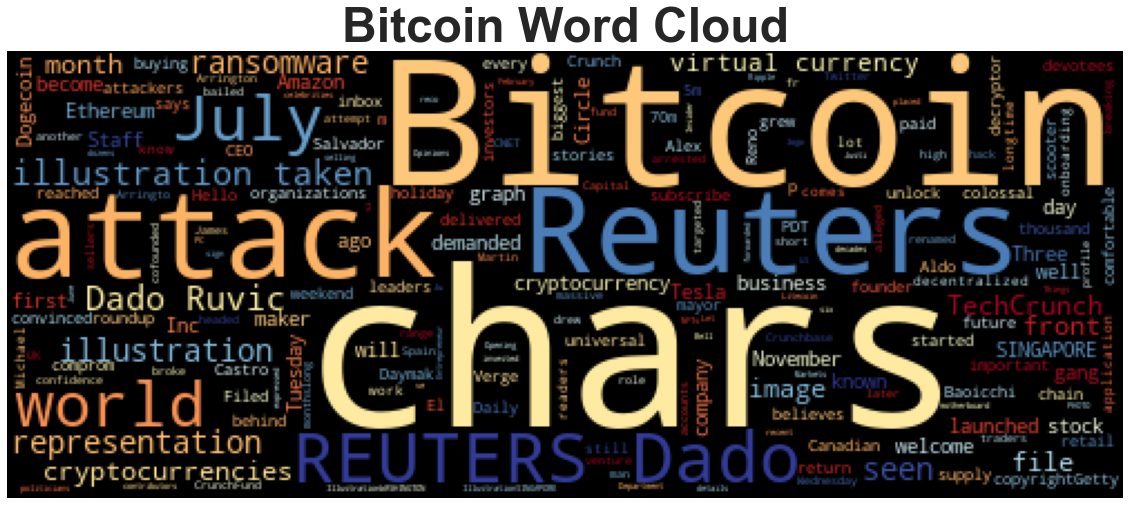

In [107]:
# Generate the Bitcoin word cloud
wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")

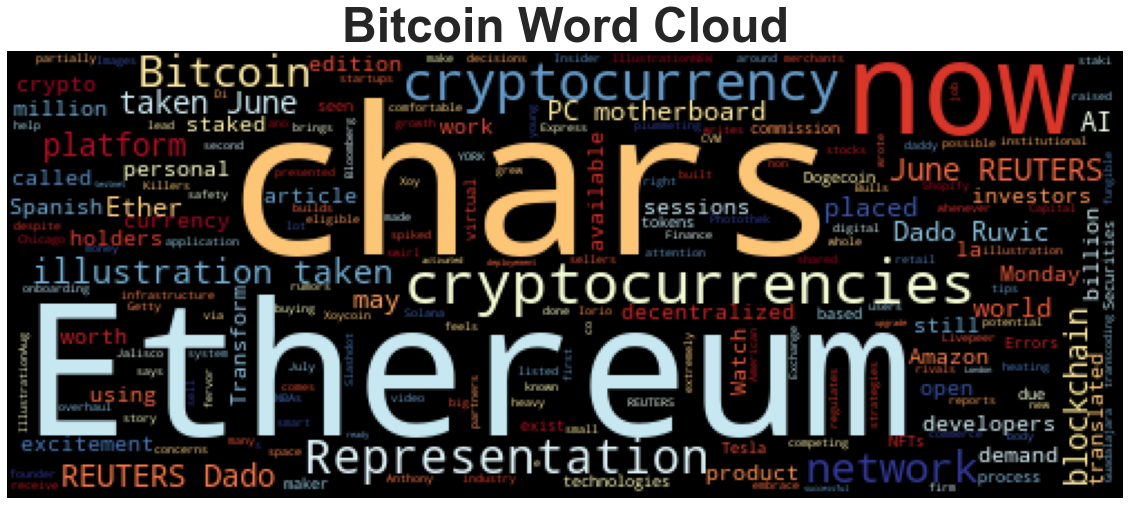

In [109]:
# Generate the Ethereum word cloud
wordcloud(eth_df.text.str.cat(), title="Bitcoin Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [110]:
import spacy
from spacy import displacy

In [112]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0-py3-none-any.whl (13.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [114]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [121]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc_df.text.str.cat()
all_btc_text

'Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]image copyrightGetty Images\r\nThe gang behind a "colossal" ransomware attack has demanded $70m (£50.5m) paid in Bitcoin in return for a "universal decryptor" that it says will unlock the files of all … [+4140 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application

In [122]:
# Run the NER processor on all of the text
btc_ner= nlp(all_btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [125]:
# Render the visualization
displacy.render(btc_ner, style='ent', jupyter=True)

In [126]:
# List all Entities
for ent in btc_ner.ents:
    print(ent, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuter

---

### Ethereum NER

In [127]:
# Concatenate all of the Ethereum text together
all_eth_text = eth_df.text.str.cat()
all_eth_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Representations of cryptocurrencies Bitcoin and Ethereum are placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ruvic/IllustrationAug 3 (Reuters) - The Ethereum platform… [+2412 chars]Cryptocurrencies spiked Monday after Amazon listed an open job for a digital currency and blockchain product lead.\xa0\r\nAmazon is known for p

In [128]:
# Run the NER processor on all of the text
eth_ner= nlp(all_eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [129]:
# Render the visualization
displacy.render(eth_ner, style='ent', jupyter=True)

In [130]:
# List all Entities
for ent in eth_ner.ents:
    print(ent, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
Polygon ORG
$100 million MONEY
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo ORG
Febr

---